In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns

In [2]:
df = pd.read_csv("dataset_mood_smartphone.csv")

In [3]:
# Create columns for variables that have a value
for var in df["variable"].unique():
    df['%s'%var] = np.where(df['variable'] == var, df['value'], np.NaN)

# Split the date-time in seperate columns, transform to a datetime format
df[['date', 'time']] = df['time'].str.split(' ', 1, expand=True)
df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [4]:
ids = ['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33']

In [5]:
d = {}
for person in ids:
    d[person] = pd.DataFrame()

In [6]:
print(d['AS14.01'])

Empty DataFrame
Columns: []
Index: []


In [7]:
for i in d.keys():
    df1 = df[df['id'] == i]

    df_avg = d[i]

    # Average over the day
    take_mean = set(("mood", "activity", "circumplex.arousal", "circumplex.valence"))

    # Total time everyday
    take_sum = set(("screen", "appCat.builtin","appCat.communication","appCat.entertainment", 
                    "appCat.finance", "appCat.game", "appCat.office", "appCat.other", "appCat.social",  
                    "appCat.travel", "appCat.unknown", "appCat.utilities", "appCat.weather"))

    # Amount of calls or texts a day
    take_count = set(("call", "sms"))

    for var in df["variable"].unique():
        df2 = df1[df1[var].notna()]
        if var in take_mean:
            df_mean = df2.groupby('date').mean()
            df_avg[var] = df_mean[var]
        if var in take_sum:
            df_sum = df2.groupby('date').mean()
            df_avg[var] = df_sum[var]
        if var in take_count:
            df_count = df2.groupby('date').count()
            df_avg[var] = df_count[var]
            
    d[i] = df_avg


    

In [8]:
NAcheck = {}
SumAttr = []
for i in d.keys():
    NAcheck[i] = d[i].isna().sum()
    SumAttr.append(d[i].count())

In [9]:
NAcheckdf = pd.DataFrame(NAcheck)
NAcheckdf = NAcheckdf.T
attribute_count = []
for i in range(len(SumAttr)):
    attribute_count.append(SumAttr[i][0])

In [10]:
print(attribute_count)

[47, 41, 47, 53, 45, 48, 62, 46, 41, 53, 44, 55, 53, 56, 46, 47, 39, 55, 30, 68, 42, 38, 42, 47, 43, 37, 43]


In [11]:
NAcheckdf.to_excel("NA_check.xlsx")

In [28]:
fraction_NA = [0.001346801, 0.083469823,0.070725404,0.400609759,0.659095526,0.079138685,0.086329831,0.340232742,
0.828291894,0.827170383,0.77400873,0.11892948,0.234064711,0.649214802,0.798824912,0.667981915,0.901415206]

attributes = ['circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather']

d = {}

d = dict(zip(attributes, fraction_NA))

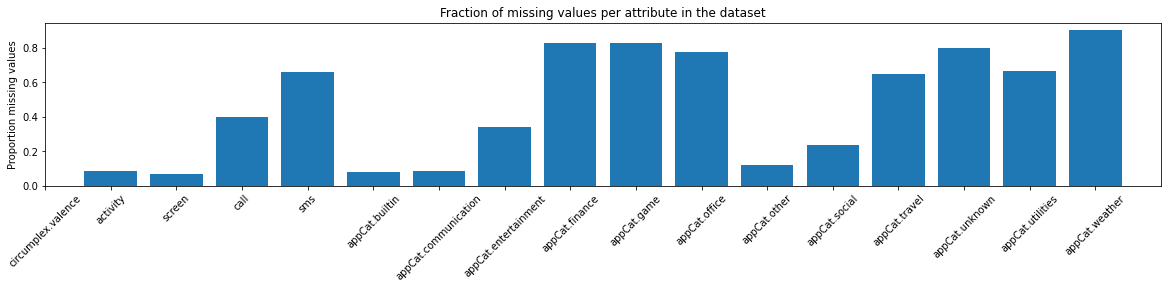

In [32]:
centers = range(len(attributes))
plt.rcParams["figure.figsize"] = (20,3)
plt.bar(centers, d.values(), align='center', tick_label=attributes)
plt.xlim([0, len(attributes)])
plt.xticks(rotation = 45)
plt.ylabel("Proportion missing values")
plt.title("Fraction of missing values per attribute in the dataset")
plt.show()